# EDA of Red Wine Quality

[EDA](https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/) (Exploratory Data Analysis) is a vital step in the data analysis process that entails visually and statistically analyzing datasets to find patterns, trends, and insights.

The principal goals of exploratory data analysis (EDA) are to detect anomalies in the dataset and develop recommendations for additional investigation, thereby guaranteeing a thorough comprehension of the subtleties of the data.

To obtain a comprehensive understanding of the data, analysts use a variety of EDA approaches, including summary statistics, correlation analysis, and data visualization using tools like box plots, scatter plots, and histograms.

EDA provides insightful information that helps with hypothesis creation and decision-making by improving knowledge of data distribution, variable correlations, and anomalies. When all is said and done, the efficacy of data-driven projects is enhanced by EDA’s capacity to identify trends and anomalies.
___

### Importing the required libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Reading the dataset

In [3]:
df = pd.read_csv(r'winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Analysisng the data

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# column to list
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
# checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# checking for duplicate values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Univariate analysis

In [12]:
quality_counts = df['quality'].value_counts()

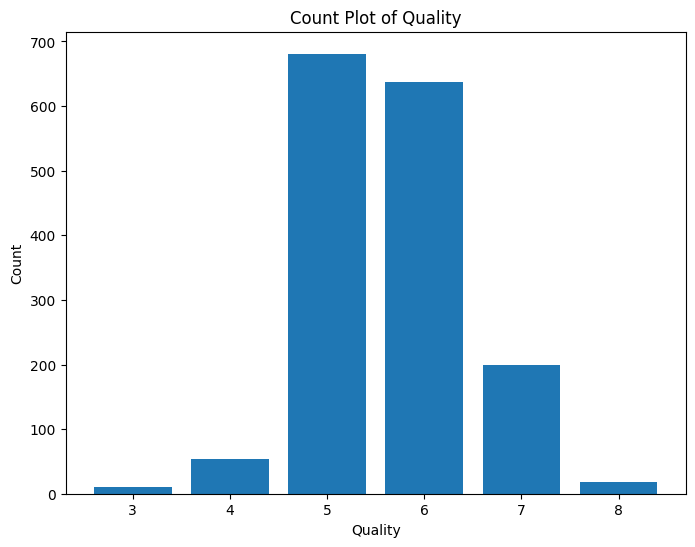

In [15]:
# plotting a countplot using matplotlib
plt.figure(figsize=(8,6))
plt.bar(quality_counts.index, quality_counts)
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

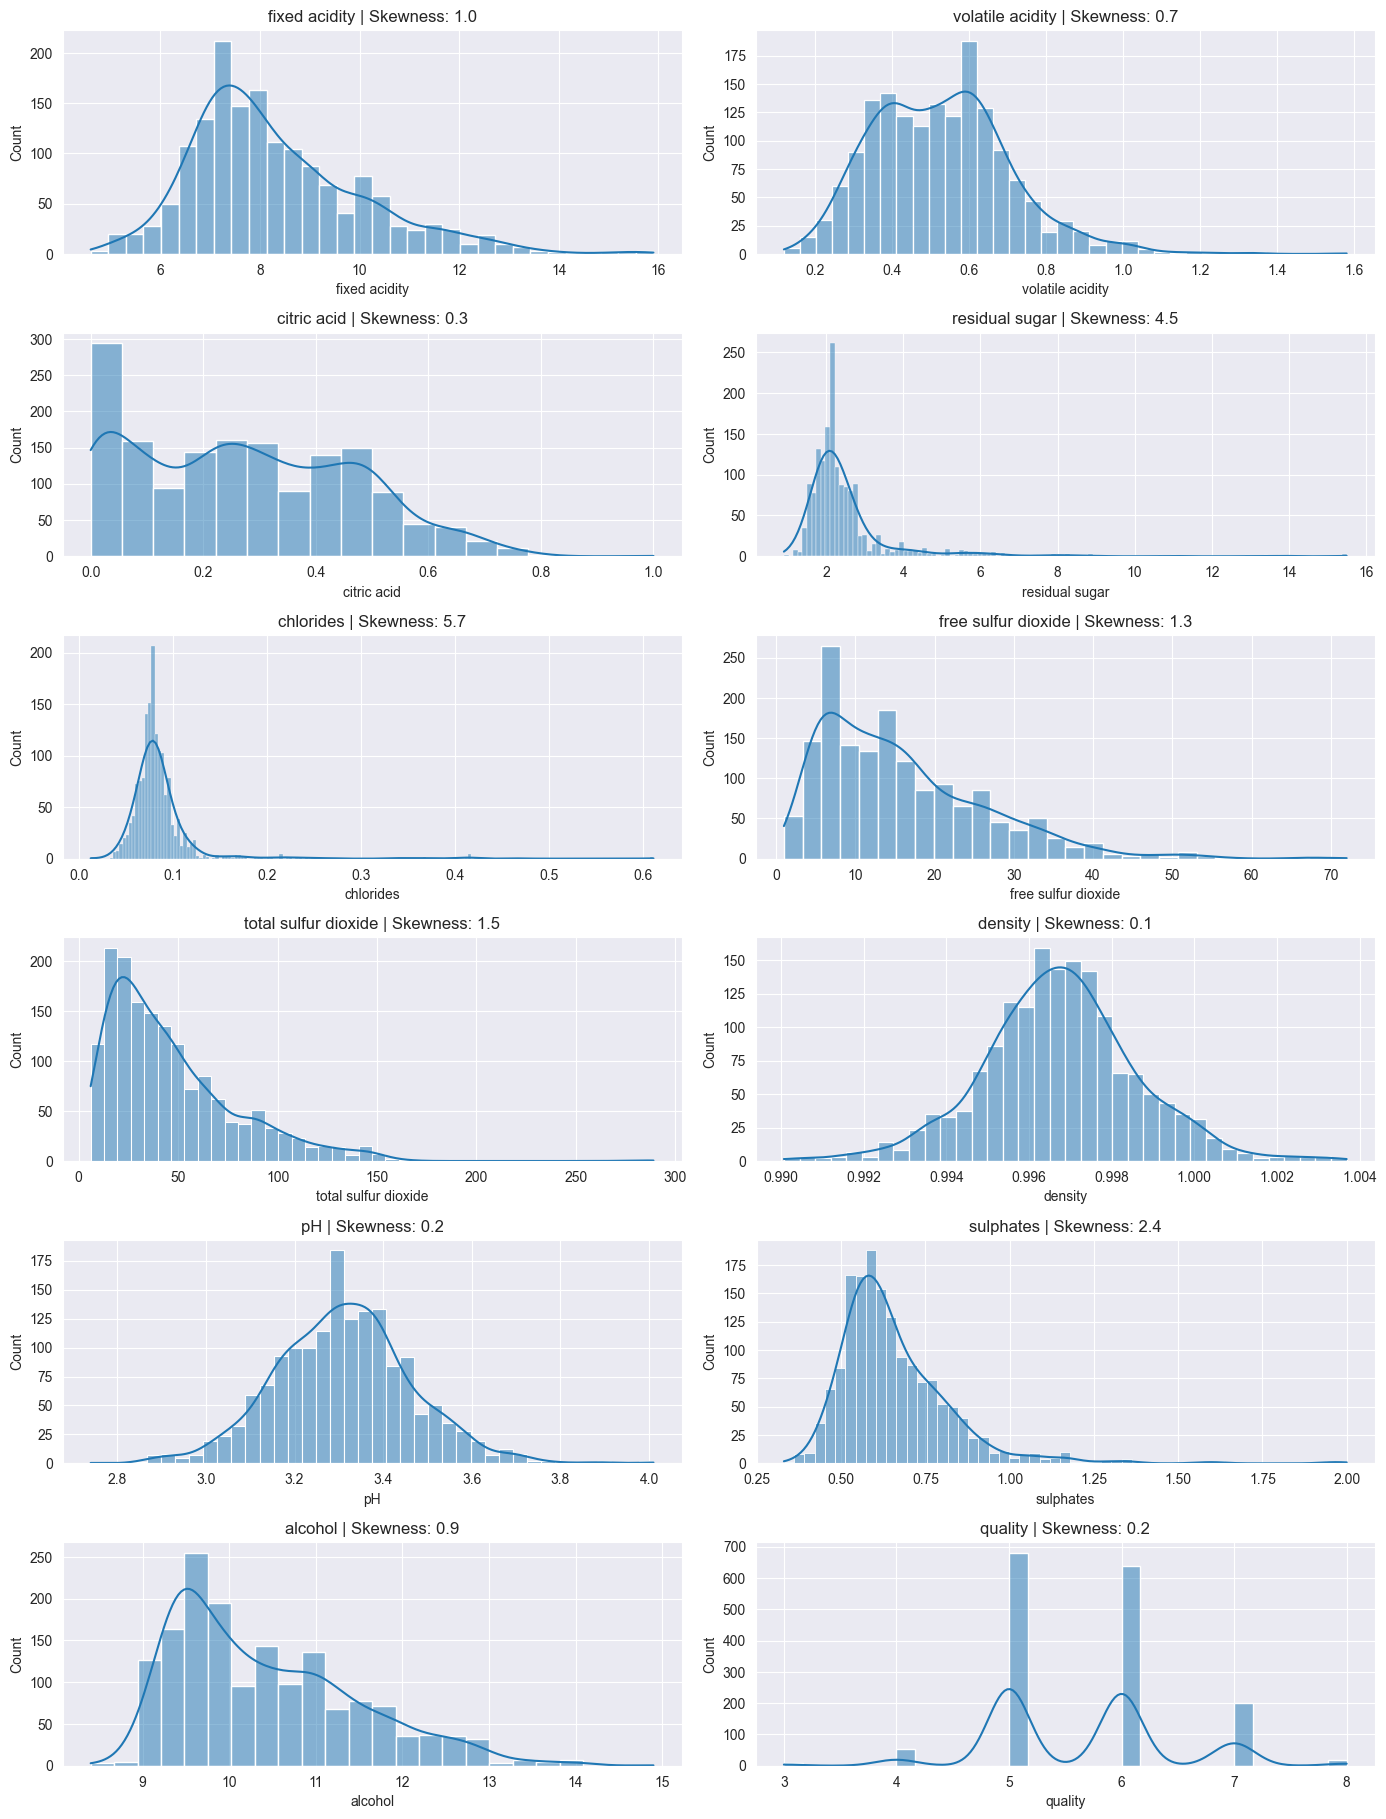

In [22]:
# setting the seaborn style
sns.set_style('darkgrid')

# identify the numerical columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns

# plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} | Skewness: {round(df[feature].skew(), 1)}')

# adjust layout and show plots
plt.tight_layout()
plt.show()

The features in this dataset that have skewness are exactly 0 depicts the symmetrical distribution and the plots with skewness 1 or above 1 is positively or right skewd distribution. In right skewd or positively skewed distribution if the tail is more on the right side, that indicates extremely high values.

C:\Users\bukab\AppData\Local\Temp\ipykernel_23820\1732196520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='quality', y='alcohol', data=df, palette='viridis')
C:\Users\bukab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bukab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


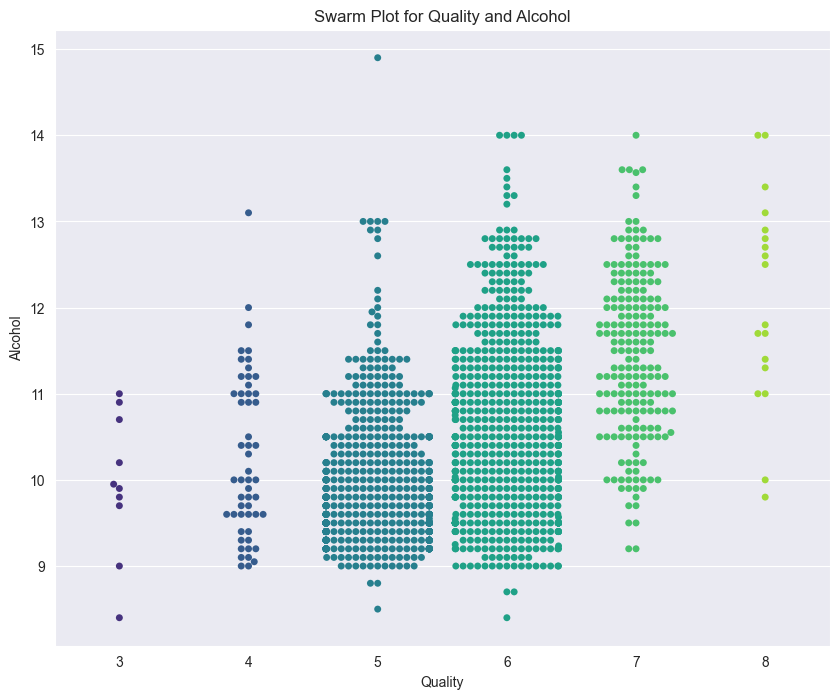

In [25]:
# using seaborn to create a swarm plot
plt.figure(figsize=(10,8))

sns.swarmplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

This plot depicts that the higher point density in specific regions shows the concentration indicating where the majority of data points cluster. The points isolated and are far away from the clusters shows the outliers. 

### Bivariate Analysis 

<Figure size 1000x600 with 0 Axes>

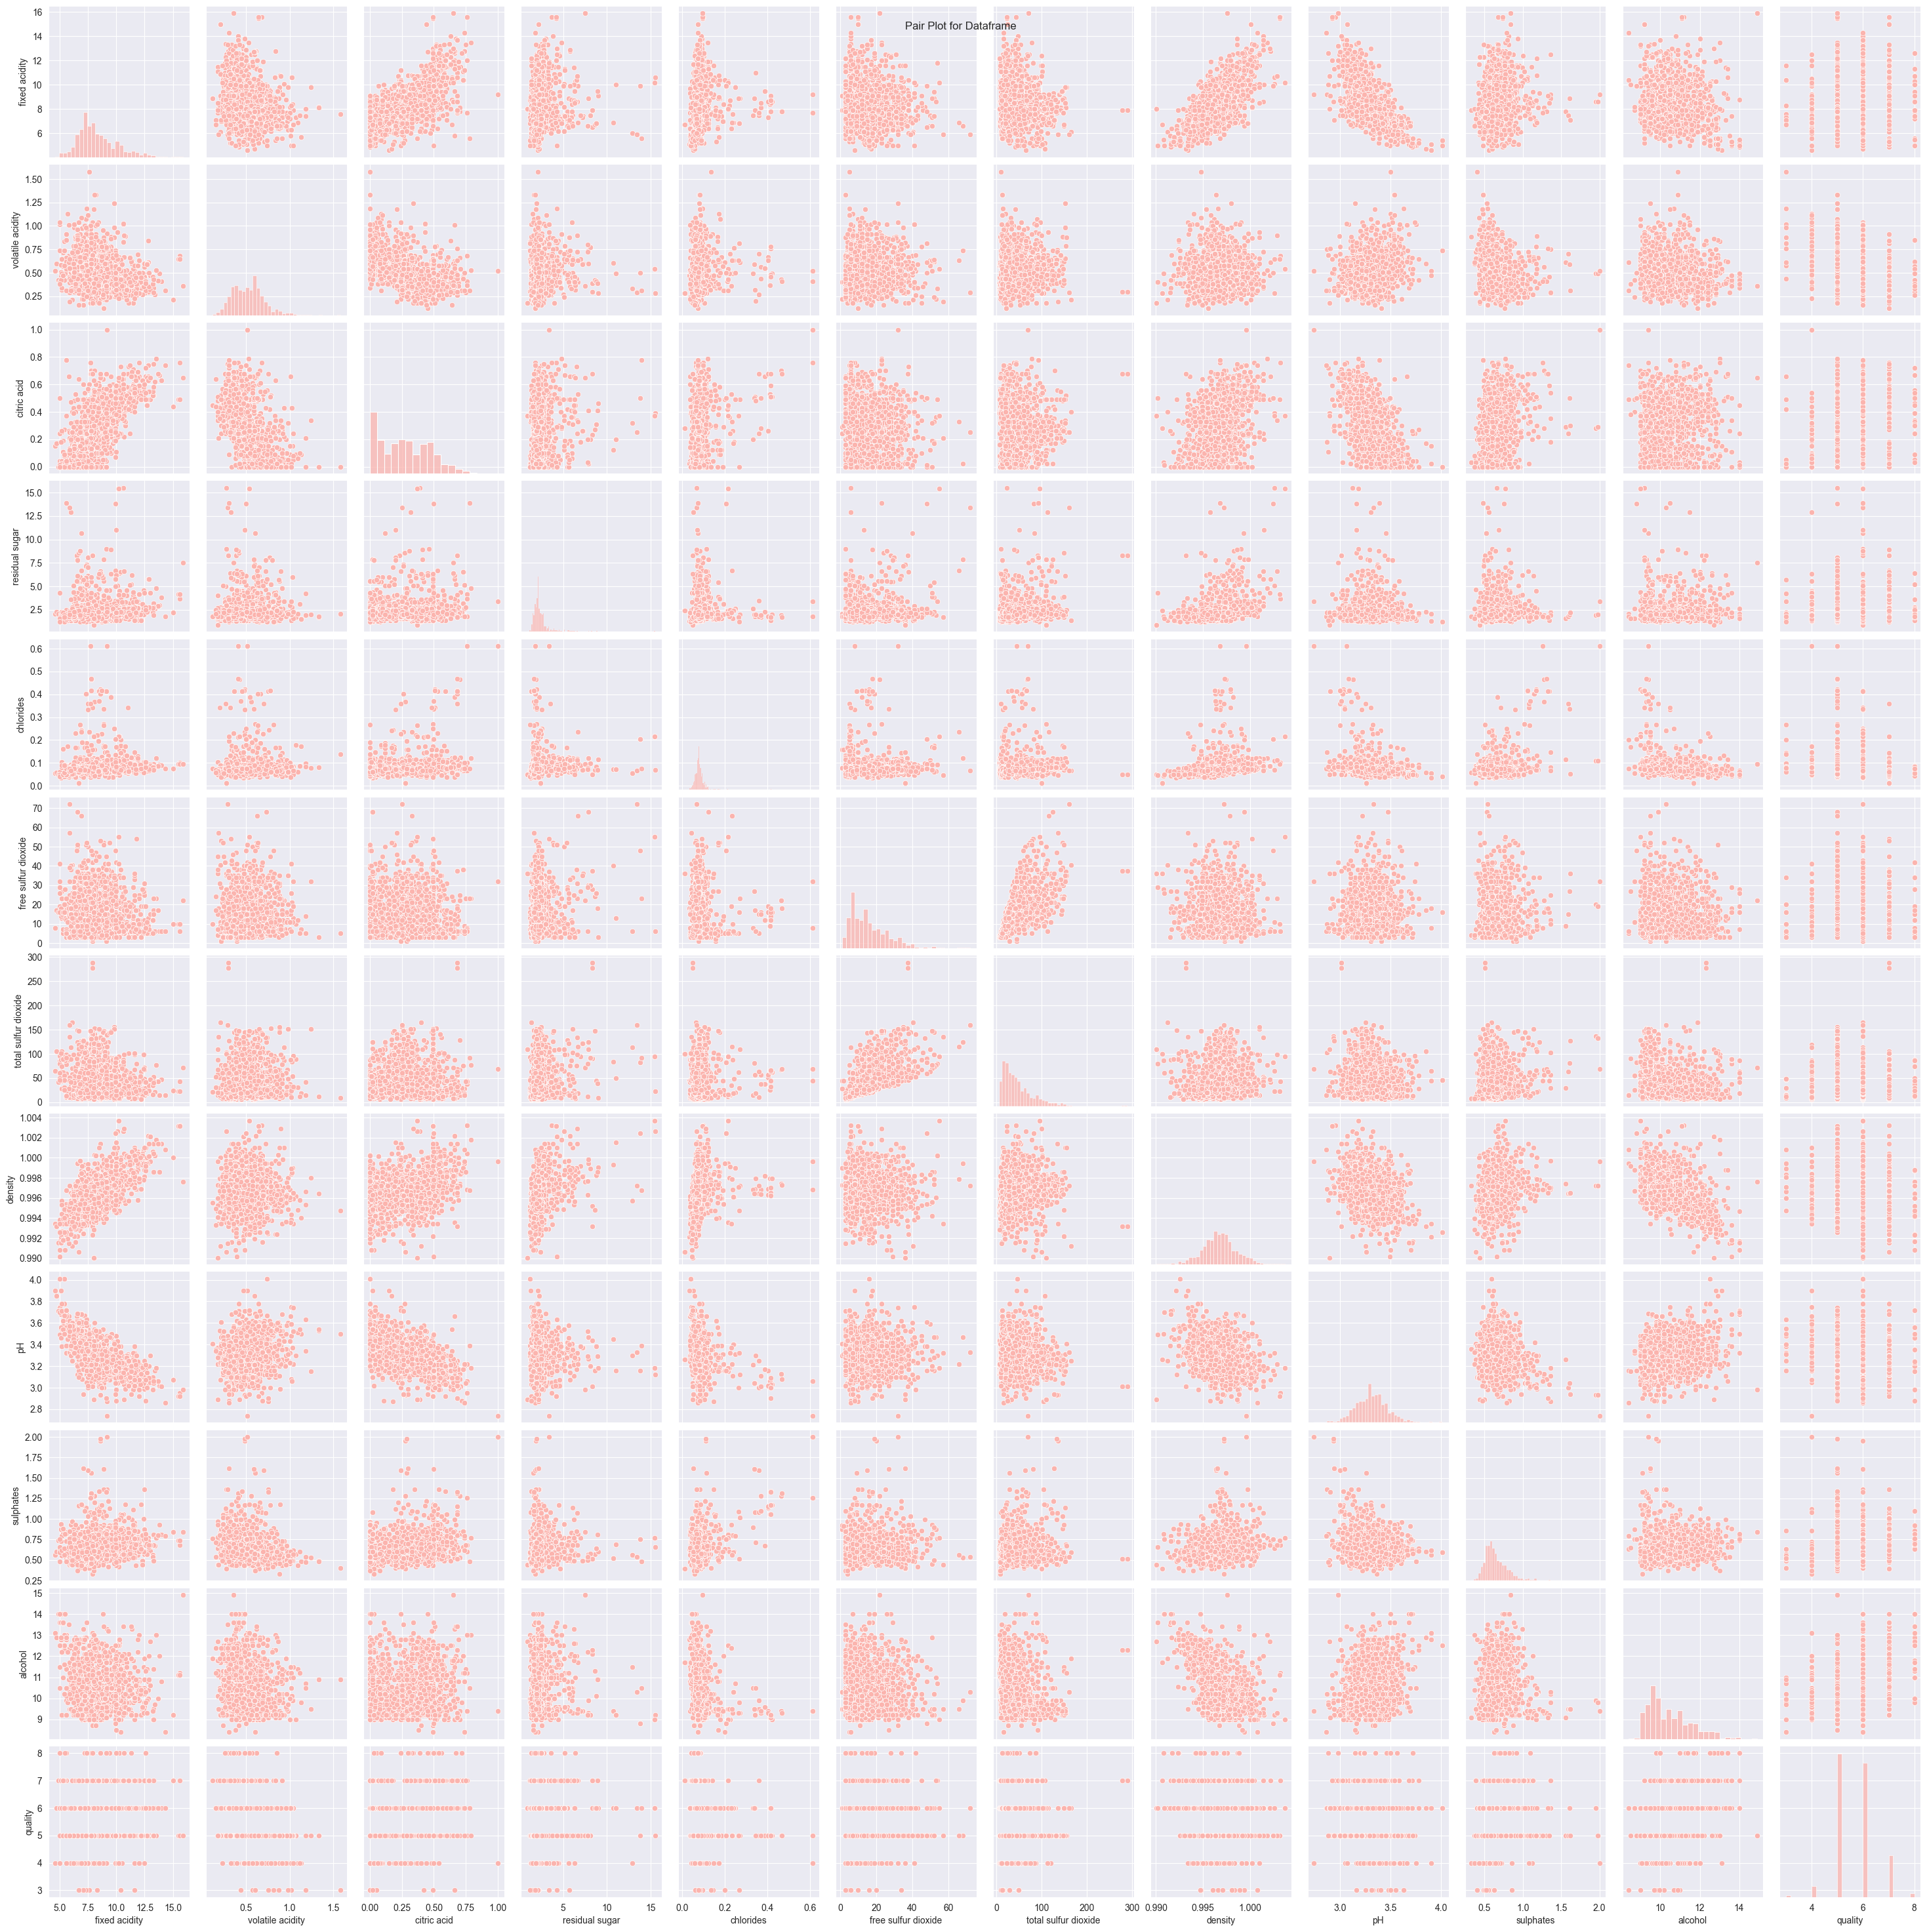

In [26]:
# pair plot
sns.set_palette('Pastel1')

plt.figure(figsize=(10,6))

sns.pairplot(df)

plt.suptitle('Pair Plot for Dataframe')
plt.show()


* If the plot is diagonal , histograms of kernel density plots , is shows the distribution of the individual variables.
* If the scatter plot is in the lower triangle, it displays the relationship between the pairs of the variables.
* If the scatter plots above and below the diagonal are mirror images, indicating symmetry.
* If the histogram plots are more centered, it represents the locations of peaks.
* Skewness is depicted by observing whether the histogram is symmetrical or skewed to the left or right.


C:\Users\bukab\AppData\Local\Temp\ipykernel_23820\1669961060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='quality', y='alcohol', palette= {'3': 'lightcoral', '4': 'lightblue',


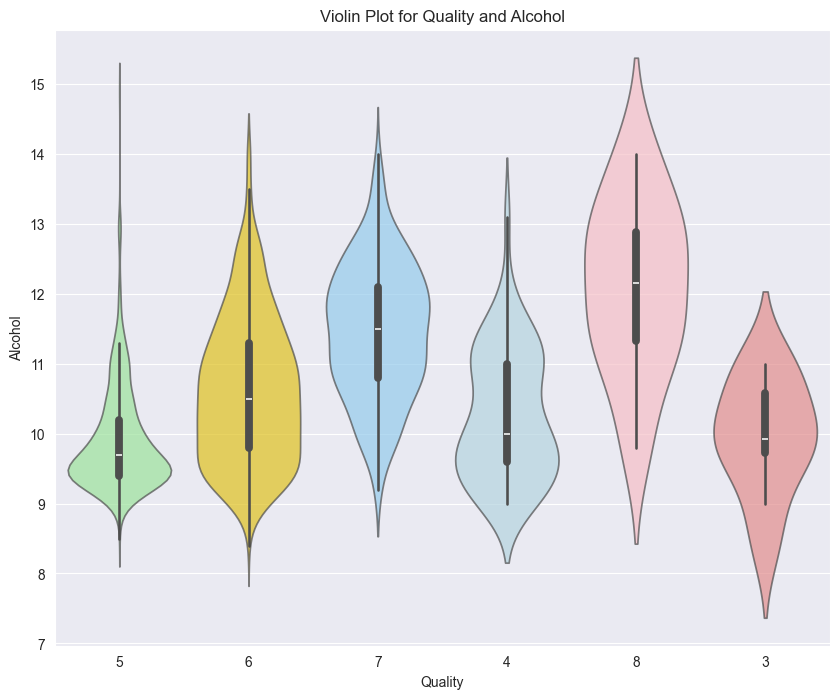

In [27]:
# violin plot
df['quality'] = df['quality'].astype(str) # convert 'quality' to categorical

plt.figure(figsize=(10,8))

sns.violinplot(data=df, x='quality', y='alcohol', palette= {'3': 'lightcoral', '4': 'lightblue', 
    '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7)

plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

* If the width is wider, it indicates higher density, suggesting more data points.
* Symmetrical plot indicates a balanced distribution.
* Peak or bulge in the violin plot represents most common value in distribution.
* Longer tails indicate great variability.
* Median line is the middle line inside the violin plot. It helps in understanding central tendencies.


<Axes: xlabel='quality', ylabel='alcohol'>

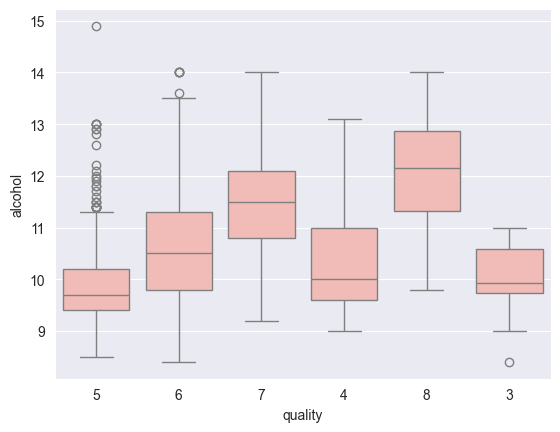

In [28]:
# plotting box plot
sns.boxplot(data=df, x='quality', y='alcohol')


* Box represents the IQR. Longer the box, greater the variability.
* The median line in the box indicates central tendency.
* Whiskers extend from box to the smallest and largest values within a specified range.
* Individual points beyond the whiskers represents outliers.
* A compact box indicates low variability while a stretched box indicates higher variability.


### Multivariate Analysis

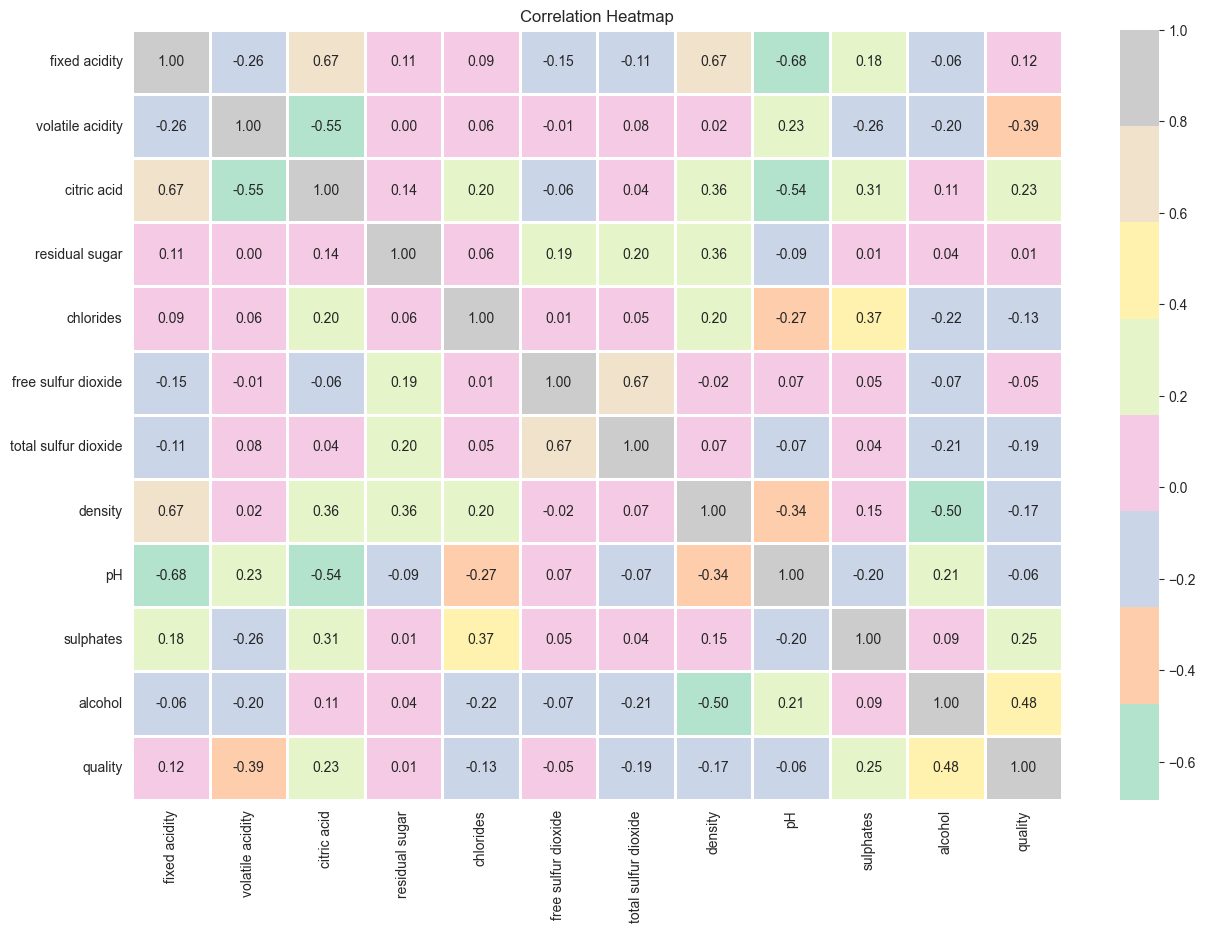

In [29]:
# creating a heatmap
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


* Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates no linear correlation.
* Darker colors signify strong correlation, while light colors represents weaker correlations.
* Positive correlation variable move in same directions. As one increases, the other also increases.
* Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.
